Original Class Distribution:
ALERT
0    5138973
2    5138973
1        571
Name: count, dtype: int64

Class Distribution After Under-Sampling:
ALERT
0    571
1    571
2    571
Name: count, dtype: int64
Number of samples before training: 1199
Total time: 367.3267238140106 seconds
Training time: 367.18521547317505 seconds
Prediction time: 0.14135289192199707 seconds

 XGBoost ({'All Features'}) Metrics:
Accuracy: 0.9980544747081712
Precision: 0.9980657859017282
Recall: 0.9980544747081712
F1 Score: 0.9980544747081712


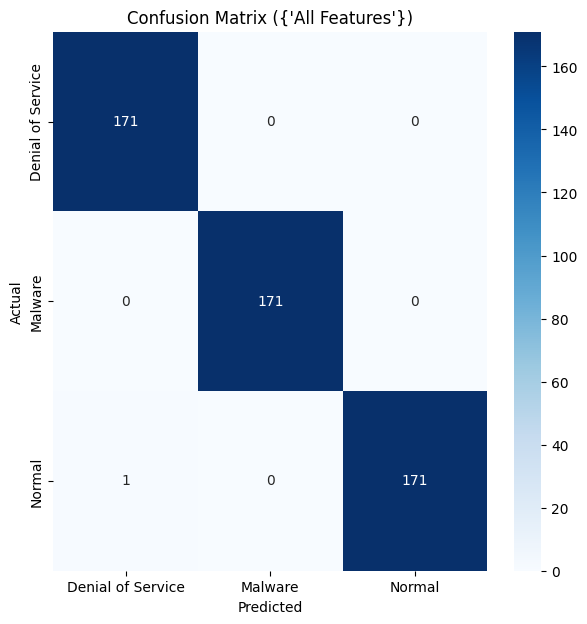

In [ ]:
import xgboost as xgb
import pandas as pd
import time
import numpy as np
import sys
import warnings
warnings.filterwarnings('ignore')


sys.path.append('/home/ibibers/XAI_Evalation_For_IDS_datasets/Datasets_prepration')
from Simargl import data_preprocessing, evaluate_model, plot_confusion_matrix

le, X, y, X_train, X_test, y_train, y_test, df  = data_preprocessing()
import time
start_total_time = time.time()
xgb_model = xgb.XGBClassifier(random_state=42, learning_rate=0.001, objective='multi:softmax')

start_train_time = time.time()
xgb_model.fit(X_train, y_train)
end_train_time = time.time()
start_pred_time = time.time()
y_pred_encoded_class = xgb_model.predict(X_test)
end_pred_time = time.time()
end_total_time = time.time()

total_time = end_total_time - start_total_time
training_time = end_train_time - start_train_time
prediction_time = end_pred_time - start_pred_time

print("Number of samples before training:", len(X_train))
print(f"Total time: {total_time} seconds")
print(f"Training time: {training_time} seconds")
print(f"Prediction time: {prediction_time} seconds")

y_pred_class = le.inverse_transform(y_pred_encoded_class)
y_test_labels = le.inverse_transform(y_test)

metrics = evaluate_model(y_test_labels, y_pred_class, f" XGBoost ({{'All Features'}})")

plot_confusion_matrix(y_test_labels, y_pred_class, le.classes_, f"Confusion Matrix ({{'All Features'}})")
# ----------------------------- XAI methods --------------------------------

sys.path.append('/home/ibibers/XAI_Evalation_For_IDS_datasets/XAI_Methods')
from SHAP import explain_with_shap
from LIME import explain_with_lime

shap_values, Shap_explainer = explain_with_shap(xgb_model, X_train, X_test, model_type=None, num_samples=5000)


lime_explianer, Lime_exp_Inst = explain_with_lime(
    model=xgb_model,
    X_train=X_train,
    X_test=X_test,
    mode='classification',
    num_features=77,
    num_samples=5000,     
    kernel_width=None,  
    random_state=42,       
    discretize_continuous=True,
    return_instance_exp=True
)



In [ ]:
print("SHAP values shape:", shap_values.shape)
print ("SHAP explainer:", Shap_explainer)


SHAP values shape: (514, 27, 3)
SHAP explainer: <shap.explainers._tree.TreeExplainer object at 0x7f7ef929b2e0>


In [ ]:
print("LIME explainer:", lime_explianer)
print("LIME explanation instance:", Lime_exp_Inst)

print("LIME explanation instance details:", Lime_exp_Inst.as_list())


LIME explainer: <lime.lime_tabular.LimeTabularExplainer object at 0x7f7efc383d90>
LIME explanation instance: <lime.explanation.Explanation object at 0x7f7ef91102b0>
LIME explanation instance details: [('-0.27 < IPV4_SRC_ADDR <= 2.34', 0.029889726050664076), ('ANALYSIS_TIMESTAMP > 5.62', 0.0201479952842352), ('FIRST_SWITCHED > 4.29', 0.01976988523178417), ('-0.52 < IPV4_DST_ADDR <= 1.16', 0.007163186490960127), ('FLOW_ID <= -33.50', 0.006811744100151753), ('-0.01 < IN_BYTES <= -0.01', 0.0009120857625609315), ('TCP_WIN_SCALE_OUT <= -0.28', 0.0007909829720335777), ('LAST_SWITCHED > 4.29', -0.00039731948173221606), ('TOTAL_FLOWS_EXP <= -33.50', -0.0003521388479493545), ('TCP_WIN_MSS_IN <= -1.21', 0.0003428578960230459), ('TCP_FLAGS <= -0.49', 0.00031367190144579183), ('FLOW_DURATION_MILLISECONDS <= -0.32', 0.0002831167460696706), ('TCP_WIN_MAX_OUT <= -0.30', 0.00027963454635427466), ('DST_TOS <= -0.22', 0.00025600255917569096), ('IN_PKTS <= -0.02', -0.00023039558948275747), ('TCP_WIN_MIN_O

EVALUATING EXPLANATORY POWER

--- SHAP Explanatory Power ---

SHAP Results (Predicted Classes):
  Mean Raw Power: 0.1406
  Std Raw Power: 0.0075
  Min Raw Power: 0.0716
  Max Raw Power: 0.1885

  Mean Normalized Power: 1.0000
  Std Normalized Power: 0.0000
  R² Score: 1.0000
  ✓ Excellent: SHAP explanations highly correlate with model outputs
  ✓ Excellent: Explanations fully account for model outputs

--- LIME Explanatory Power ---
=== LIME EXPLAINER DIAGNOSTICS ===
Explainer type: <class 'lime.lime_tabular.LimeTabularExplainer'>
Explainer mode: classification
Single prediction probabilities shape: (1, 3)
Single prediction probabilities: [0.30883622 0.38206032 0.30910343]
LIME weights for single instance: 0.0861
Model output for single instance: 0.3821



LIME Results:
  Mean Raw Power: 0.0603
  Std Raw Power: 0.0179
  Min Raw Power: 0.0431
  Max Raw Power: 0.0973

  Mean Normalized Power: 0.7051
  Std Normalized Power: 0.4756
  R² Score: -0.5539
  ✗ Warning: LIME explanations may not fully capture model behavior
  ~ Good: Explanations mostly account for model outputs

--- SHAP vs LIME Comparison ---
               Metric     SHAP      LIME
       Mean Raw Power 0.140574  0.060306
Mean Normalized Power 1.000000  0.705069
             R² Score 1.000000 -0.553945
        Std Raw Power 0.007463  0.017922

--- Overall Assessment ---
✓ SHAP has better explanatory power for this model

--- Distribution Analysis ---

SHAP Power Distribution Percentiles:
  25th percentile: 0.1392
  50th percentile (median): 0.1394
  75th percentile: 0.1419
  90th percentile: 0.1447
  95th percentile: 0.1447

LIME Power Distribution Percentiles:
  25th percentile: 0.0469
  50th percentile (median): 0.0503
  75th percentile: 0.0730
  90th percentile: 0.0911
  95

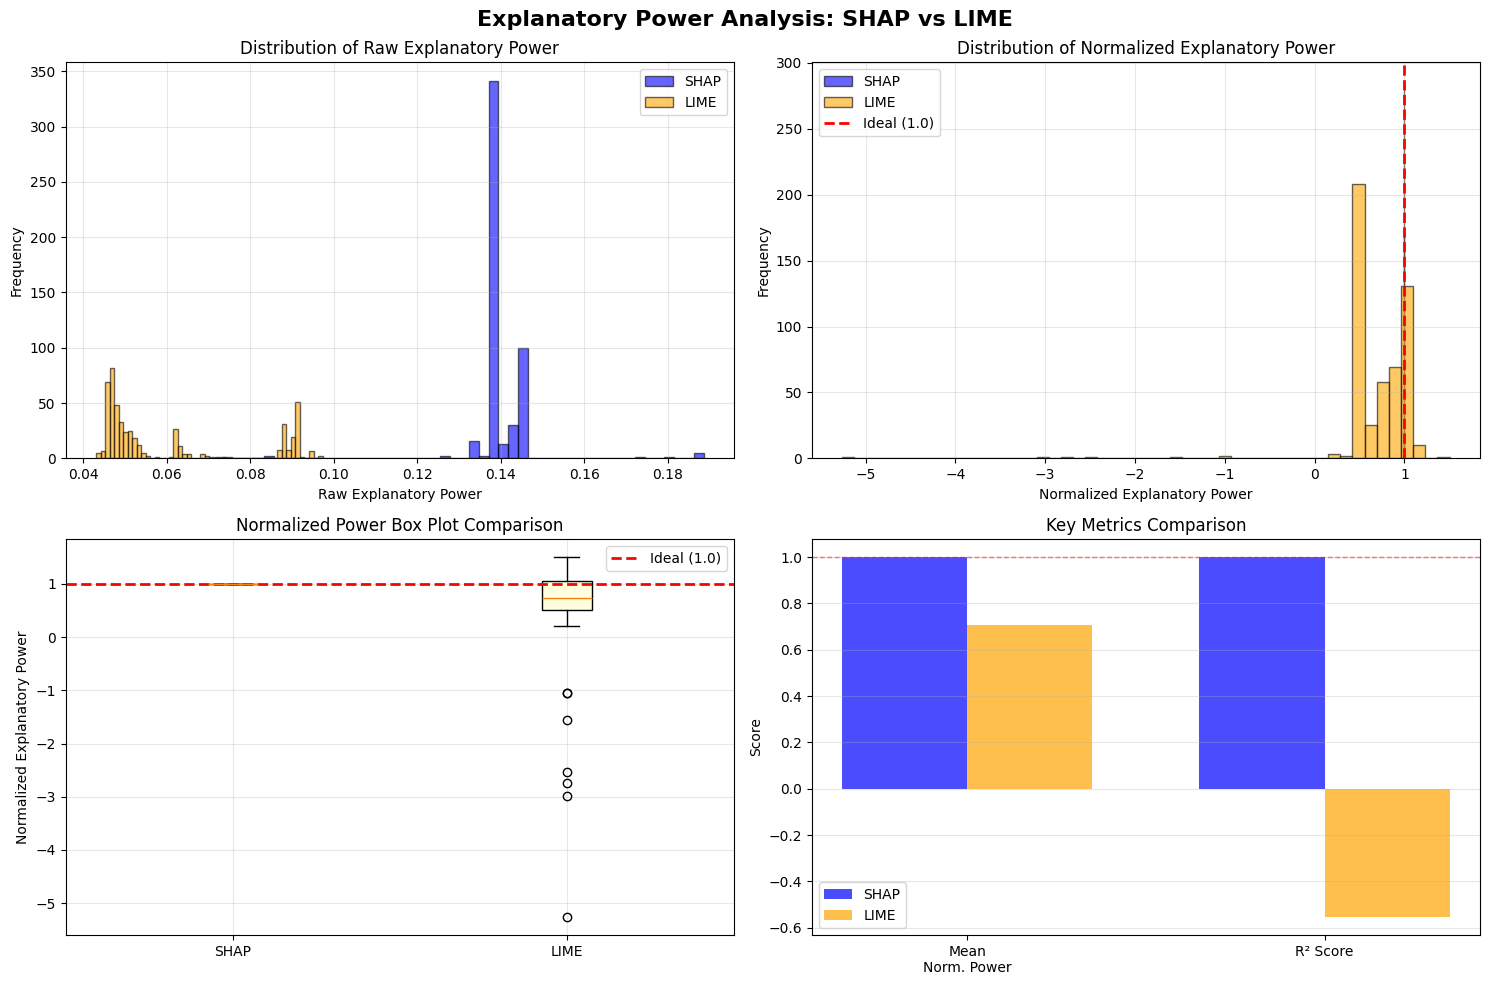

✓ Visualizations created successfully

EXPLANATORY POWER EVALUATION COMPLETE


In [ ]:
import sys
import importlib
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append('/home/ibibers/XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Explanatory_Power
importlib.reload(Explanatory_Power)
from Explanatory_Power import XAIExplanatoryPowerEvaluator


ep_evaluator = XAIExplanatoryPowerEvaluator(model=xgb_model, n_jobs=-1, random_state=42)

print("=" * 80)
print("EVALUATING EXPLANATORY POWER")
print("=" * 80)


print("\n--- SHAP Explanatory Power ---")
shap_results_predicted = ep_evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.head(5000),  
    method='shap',
    normalization='output',  
    class_idx=None  
)

print("\nSHAP Results (Predicted Classes):")
print(f"  Mean Raw Power: {shap_results_predicted['mean_raw_power']:.4f}")
print(f"  Std Raw Power: {shap_results_predicted['std_raw_power']:.4f}")
print(f"  Min Raw Power: {shap_results_predicted['min_raw_power']:.4f}")
print(f"  Max Raw Power: {shap_results_predicted['max_raw_power']:.4f}")
print(f"\n  Mean Normalized Power: {shap_results_predicted['mean_normalized_power']:.4f}")
print(f"  Std Normalized Power: {shap_results_predicted['std_normalized_power']:.4f}")
print(f"  R² Score: {shap_results_predicted['r2_score']:.4f}")


if shap_results_predicted['r2_score'] > 0.8:
    print("   Excellent: SHAP explanations highly correlate with model outputs")
elif shap_results_predicted['r2_score'] > 0.6:
    print("  Good: SHAP explanations reasonably correlate with model outputs")
else:
    print("  : SHAP explanations may not fully capture model behavior")


if 0.8 <= shap_results_predicted['mean_normalized_power'] <= 1.2:
    print("   Excellent: Explanations fully account for model outputs")
elif 0.6 <= shap_results_predicted['mean_normalized_power'] <= 1.4:
    print("  Good: Explanations mostly account for model outputs")
else:
    print("   Explanations may over/under-explain model outputs")


print("\n" + "=" * 80)
print("--- LIME Explanatory Power ---")


print("=== LIME EXPLAINER DIAGNOSTICS ===")
print(f"Explainer type: {type(lime_explianer)}")
print(f"Explainer mode: {lime_explianer.mode}")


test_instance = X_test.iloc[0].values
if xgb_model.predict_proba is not None:
    pred_fn = lambda x: xgb_model.predict_proba(pd.DataFrame(x, columns=X_test.columns))
    single_prob = pred_fn([test_instance])
    print(f"Single prediction probabilities shape: {single_prob.shape}")
    print(f"Single prediction probabilities: {single_prob[0]}")
    

exp = lime_explianer.explain_instance(
    test_instance.astype(np.double),
    pred_fn,
    num_features=10,
    labels=[xgb_model.predict([test_instance])[0]]
)

weights = dict(exp.as_list(label=xgb_model.predict([test_instance])[0]))
print(f"LIME weights for single instance: {sum(abs(v) for v in weights.values()):.4f}")
print(f"Model output for single instance: {single_prob[0][xgb_model.predict([test_instance])[0]]:.4f}")



lime_results = ep_evaluator.evaluate(
    explainer=lime_explianer,
    X=X_test.head(5000),  
    method='lime',
    normalization='output', 
    class_idx=None 
)

print("\nLIME Results:")
print(f"  Mean Raw Power: {lime_results['mean_raw_power']:.4f}")
print(f"  Std Raw Power: {lime_results['std_raw_power']:.4f}")
print(f"  Min Raw Power: {lime_results['min_raw_power']:.4f}")
print(f"  Max Raw Power: {lime_results['max_raw_power']:.4f}")
print(f"\n  Mean Normalized Power: {lime_results['mean_normalized_power']:.4f}")
print(f"  Std Normalized Power: {lime_results['std_normalized_power']:.4f}")
print(f"  R² Score: {lime_results['r2_score']:.4f}")


if lime_results['r2_score'] > 0.8:
    print("  Excellent: LIME explanations highly correlate with model outputs")
elif lime_results['r2_score'] > 0.6:
    print("  Good: LIME explanations reasonably correlate with model outputs")
else:
    print("  : LIME explanations may not fully capture model behavior")


if 0.8 <= lime_results['mean_normalized_power'] <= 1.2:
    print("   Excellent: Explanations fully account for model outputs")
elif 0.6 <= lime_results['mean_normalized_power'] <= 1.4:
    print("   Good: Explanations mostly account for model outputs")
else:
    print("  : Explanations may over/under-explain model outputs")


print("\n" + "=" * 80)
print("--- SHAP vs LIME Comparison ---")
print("=" * 80)

comparison_df = pd.DataFrame({
    'Metric': ['Mean Raw Power', 'Mean Normalized Power', 'R² Score', 'Std Raw Power'],
    'SHAP': [
        shap_results_predicted['mean_raw_power'],
        shap_results_predicted['mean_normalized_power'],
        shap_results_predicted['r2_score'],
        shap_results_predicted['std_raw_power']
    ],
    'LIME': [
        lime_results['mean_raw_power'],
        lime_results['mean_normalized_power'],
        lime_results['r2_score'],
        lime_results['std_raw_power']
    ]
})

print(comparison_df.to_string(index=False))


print("\n--- Overall Assessment ---")
shap_score = (shap_results_predicted['r2_score'] + 
              (1 if 0.8 <= shap_results_predicted['mean_normalized_power'] <= 1.2 else 0.5))
lime_score = (lime_results['r2_score'] + 
              (1 if 0.8 <= lime_results['mean_normalized_power'] <= 1.2 else 0.5))

if shap_score > lime_score:
    print("SHAP has better explanatory power for this model")
elif lime_score > shap_score:
    print(" LIME has better explanatory power for this model")
else:
    print("SHAP and LIME have similar explanatory power")


print("\n" + "=" * 80)
print("--- Distribution Analysis ---")
print("=" * 80)


print("\nSHAP Power Distribution Percentiles:")
shap_percentiles = np.percentile(shap_results_predicted['raw_powers'], [25, 50, 75, 90, 95])
print(f"  25th percentile: {shap_percentiles[0]:.4f}")
print(f"  50th percentile (median): {shap_percentiles[1]:.4f}")
print(f"  75th percentile: {shap_percentiles[2]:.4f}")
print(f"  90th percentile: {shap_percentiles[3]:.4f}")
print(f"  95th percentile: {shap_percentiles[4]:.4f}")

print("\nLIME Power Distribution Percentiles:")
lime_percentiles = np.percentile(lime_results['raw_powers'], [25, 50, 75, 90, 95])
print(f"  25th percentile: {lime_percentiles[0]:.4f}")
print(f"  50th percentile (median): {lime_percentiles[1]:.4f}")
print(f"  75th percentile: {lime_percentiles[2]:.4f}")
print(f"  90th percentile: {lime_percentiles[3]:.4f}")
print(f"  95th percentile: {lime_percentiles[4]:.4f}")


print("\n" + "=" * 80)
print("--- Creating Visualizations ---")
print("=" * 80)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Explanatory Power Analysis: SHAP vs LIME', fontsize=16, fontweight='bold')

axes[0, 0].hist(shap_results_predicted['raw_powers'], bins=50, alpha=0.6, label='SHAP', color='blue', edgecolor='black')
axes[0, 0].hist(lime_results['raw_powers'], bins=50, alpha=0.6, label='LIME', color='orange', edgecolor='black')
axes[0, 0].set_xlabel('Raw Explanatory Power')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Raw Explanatory Power')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)


axes[0, 1].hist(shap_results_predicted['normalized_powers'], bins=50, alpha=0.6, label='SHAP', color='blue', edgecolor='black')
axes[0, 1].hist(lime_results['normalized_powers'], bins=50, alpha=0.6, label='LIME', color='orange', edgecolor='black')
axes[0, 1].set_xlabel('Normalized Explanatory Power')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Normalized Explanatory Power')
axes[0, 1].axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Ideal (1.0)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)



box_data = [shap_results_predicted['normalized_powers'], lime_results['normalized_powers']]
bp = axes[1, 0].boxplot(box_data, labels=['SHAP', 'LIME'], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
bp['boxes'][1].set_facecolor('lightyellow')
axes[1, 0].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Ideal (1.0)')
axes[1, 0].set_ylabel('Normalized Explanatory Power')
axes[1, 0].set_title('Normalized Power Box Plot Comparison')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)


metrics_names = ['Mean\nNorm. Power', 'R² Score']
shap_metrics = [shap_results_predicted['mean_normalized_power'], shap_results_predicted['r2_score']]
lime_metrics = [lime_results['mean_normalized_power'], lime_results['r2_score']]

x = np.arange(len(metrics_names))
width = 0.35

axes[1, 1].bar(x - width/2, shap_metrics, width, label='SHAP', color='blue', alpha=0.7)
axes[1, 1].bar(x + width/2, lime_metrics, width, label='LIME', color='orange', alpha=0.7)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Key Metrics Comparison')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')


axes[1, 1].axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print("✓ Visualizations created successfully")
print("\n" + "=" * 80)
print("EXPLANATORY POWER EVALUATION COMPLETE")
print("=" * 80)

In [10]:
# Define which features are considered "actionable" in a network security context
# These are features that security professionals could reasonably modify
actionable_features = [col for col in X_test.columns if any(x in col.lower() for x in 
                      ['rate', 'flag', 'port', 'protocol', 'count', 'packet', 'byte' , 'map', 'length', 'size', 'duration'])]

print(f"Number of total features: {len(X_test.columns)}")
print(f"Number of actionable features: {len(actionable_features)}")
print("Sample of actionable features:", actionable_features[:76])

Number of total features: 27
Number of actionable features: 8
Sample of actionable features: ['PROTOCOL_MAP', 'L4_SRC_PORT', 'L4_DST_PORT', 'FLOW_DURATION_MILLISECONDS', 'PROTOCOL', 'TCP_FLAGS', 'IN_BYTES', 'OUT_BYTES']


In [8]:
actionable_features = [
    'PROTOCOL', 'PROTOCOL_MAP', 'L4_SRC_PORT', 'L4_DST_PORT',
    'TCP_FLAGS', 'SRC_TOS', 'DST_TOS', 'TCP_WIN_SCALE_IN', 'TCP_WIN_SCALE_OUT',
    'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS'
]

==== ACTIONABILITY SUMMARY ====
LIME Actionability Mean Score: 0.20902891513679714
SHAP Actionability Mean Score: 1.0
==== Actionability Summary Table ====


,Method,Mean,Std,Median,N
0,LIME,0.209029,0.107408,0.193436,10000
1,SHAP,1.000000,0.000000,1.000000,10000



==== Comparison (LIME vs SHAP) ====


,Paired t-stat,Paired p-value,Cohen's d (paired),Pearson r,Pearson p-value,Significant (alpha=0.05)
0,-736.419,0.00e+00,-7.364,nan,nan,Yes


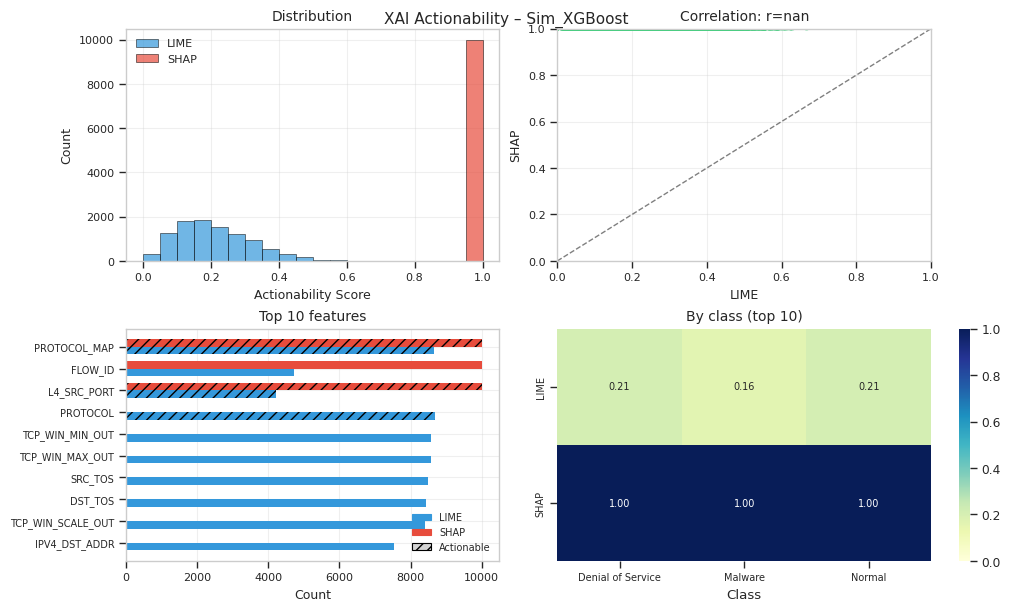

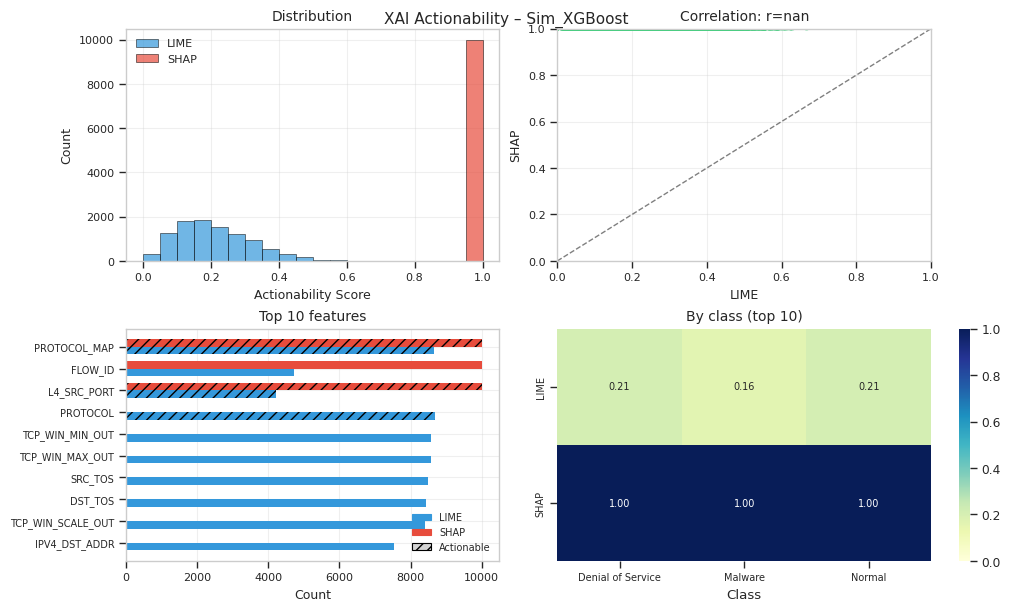

In [ ]:
import sys
import importlib
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sys.path.append('/home/ibibers/XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Actionability
importlib.reload(Actionability)
import warnings
warnings.filterwarnings('ignore')


def get_detailed_actionability_results(evaluator, explainer, X, method, actionable_features, 
                                     top_k=15, sample_size=None, random_state=42):
    results = evaluator.evaluate_actionability(
        explainer=explainer,
        X=X,
        method=method,
        actionable_features=actionable_features,
        top_k=top_k,
        verbose=False,
        sample_size=sample_size,
        random_state=random_state,
        return_details=True   
    )
    return results


lime_results = get_detailed_actionability_results(
    evaluator=actionability_evaluator,
    explainer=lime_explianer,
    X=X_test,
    method='lime',
    actionable_features=actionable_features,
    top_k=15,
    sample_size=10000  
)

shap_results = get_detailed_actionability_results(
    evaluator=actionability_evaluator,
    explainer=Shap_explainer,
    X=X_test,
    method='shap',
    actionable_features=actionable_features,
    top_k=15,
    sample_size=10000 
)


y_pred_encoded = xgb_model.predict(X_test)
class_names = le.classes_


print("==== ACTIONABILITY SUMMARY ====")
print("LIME Actionability Mean Score:", lime_results['mean_score'])
print("SHAP Actionability Mean Score:", shap_results['mean_score'])



lime_scores = np.asarray(lime_results['instance_scores'], dtype=float)
shap_scores = np.asarray(shap_results['instance_scores'], dtype=float)
n = min(len(lime_scores), len(shap_scores))
lime_scores = lime_scores[:n]
shap_scores = shap_scores[:n]


def summarize(arr):
    return {
        "mean": float(np.mean(arr)),
        "std": float(np.std(arr, ddof=1)),
        "median": float(np.median(arr)),
        "n": int(len(arr))
    }

lime_summary = summarize(lime_scores)
shap_summary = summarize(shap_scores)

t_stat, p_ttest = stats.ttest_rel(lime_scores, shap_scores, nan_policy='omit')
diff = lime_scores - shap_scores
cohens_d = float(np.mean(diff) / (np.std(diff, ddof=1) + 1e-12))


r_corr, p_corr = stats.pearsonr(lime_scores, shap_scores)


summary_table = pd.DataFrame([
    {"Method": "LIME", "Mean": lime_summary["mean"], "Std": lime_summary["std"], "Median": lime_summary["median"], "N": lime_summary["n"]},
    {"Method": "SHAP", "Mean": shap_summary["mean"], "Std": shap_summary["std"], "Median": shap_summary["median"], "N": shap_summary["n"]},
])

comparison_table = pd.DataFrame([{
    "Paired t-stat": float(t_stat),
    "Paired p-value": float(p_ttest),
    "Cohen's d (paired)": cohens_d,
    "Pearson r": float(r_corr),
    "Pearson p-value": float(p_corr),
    "Significant (alpha=0.05)": "Yes" if p_ttest < 0.05 else "No"
}])

print("==== Actionability Summary Table ====")
display(summary_table.style.format({"Mean": "{:.6f}", "Std": "{:.6f}", "Median": "{:.6f}"}))
print("\n==== Comparison (LIME vs SHAP) ====")
display(comparison_table.style.format({"Paired p-value": "{:.2e}", "Pearson p-value": "{:.2e}", "Paired t-stat": "{:.3f}", "Pearson r": "{:.3f}", "Cohen's d (paired)": "{:.3f}"}))


Actionability.XAIActionabilityEvaluator.visualize_actionability_results(
    lime_results, shap_results, actionable_features, model_name="Sim_XGBoost",     y_pred=y_pred_encoded,
    class_names=class_names
)



Running Complete Evaluation Pipeline for XGBoost Simrgel Dataset


--- Evaluating LIME ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Evaluating SHAP ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Running Statistical Validation (n=1000) ---
  [Info] Requested validation n=1000 > available 20; using n=20.
  Validating LIME...
  Validating SHAP...

Running Complete Evaluation Pipeline for XGBoost Simrgel Dataset


--- Evaluating LIME ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Evaluating SHAP ---
  Evaluating top_k=5...
  Evaluating top_k=10...
  Evaluating top_k=15...
  Evaluating top_k=20...

--- Running Statistical Validation (n=1000) ---
  [Info] Requested validation n=1000 > available 50; using n=50.
  Validating LIME...
  Validating SHAP...

Running Complete Evaluation Pipeline for XGBoost Simrgel 

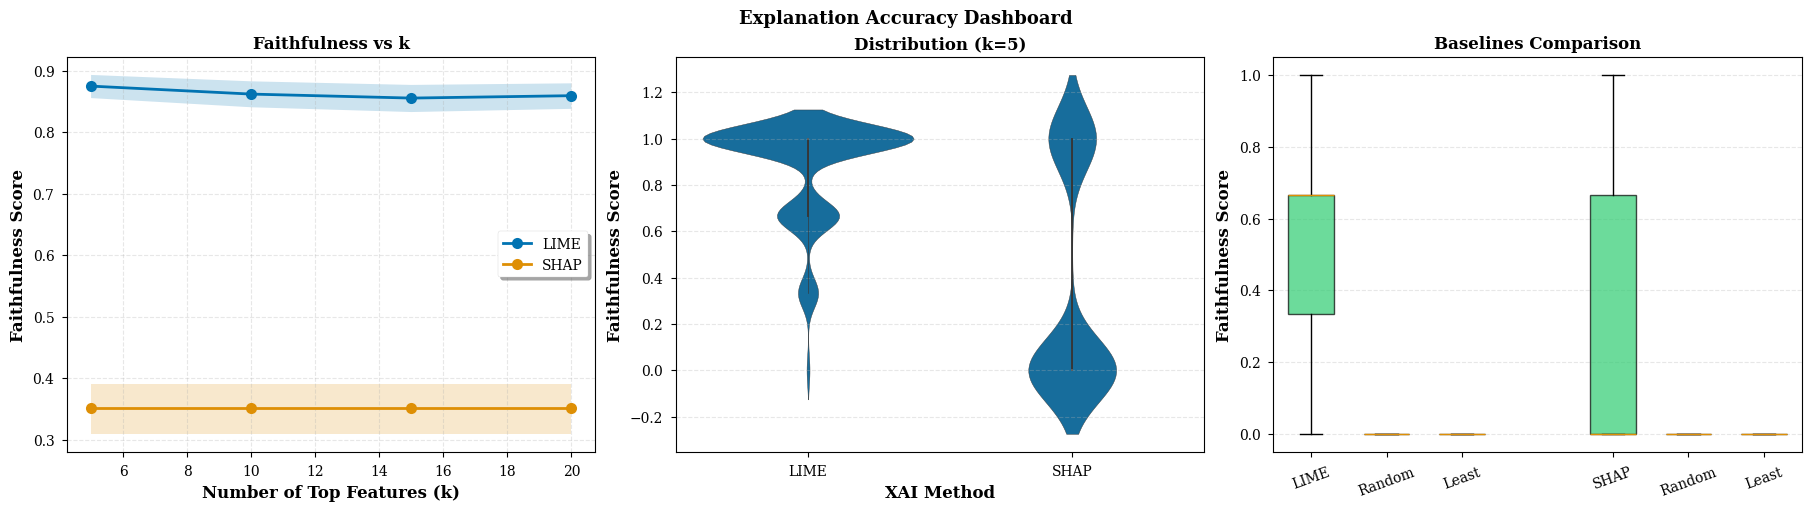


--- Generating Summary Report ---
  Saved: Exp_Acc_Sim_XGBoost_results/summary_report.txt

DT COMPLETE! All results saved to ./results/

Generated files:
  - tables/main_results.csv & .tex
  - tables/validation.csv & .tex
  - figures/faithfulness_by_k.pdf & .png
  - figures/distribution_comparison.pdf & .png
  - figures/baseline_comparison.pdf & .png
  - summary_report.txt
SHAP Faithfulness : 0.688715953307393
LIME Faithfulness : 0.6673151750972762


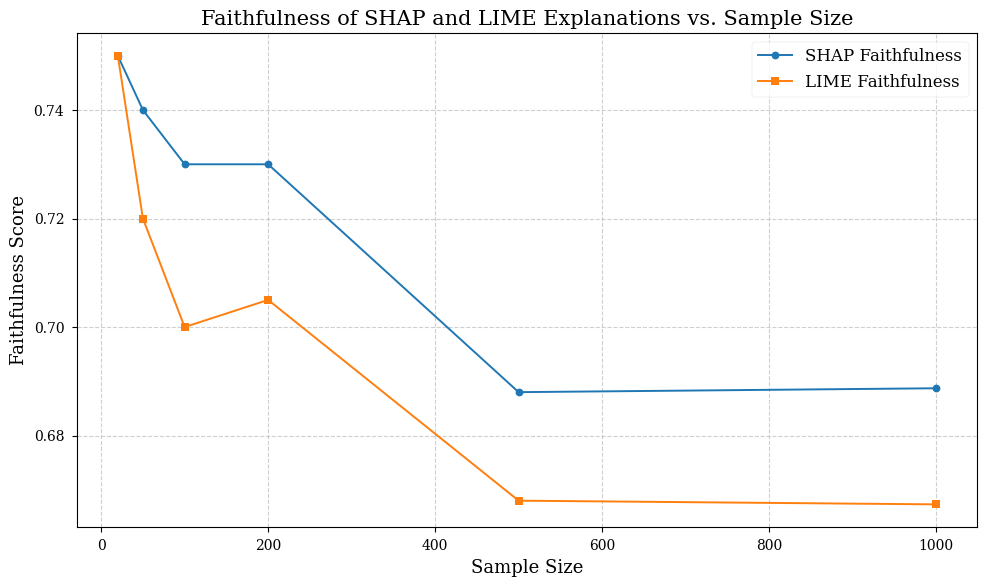

   instance_idx  faithfulness_score  \
0             0                 1.0   
1             1                 0.0   
2             2                 0.0   
3             3                 1.0   
4             4                 1.0   

                                    top_features_idx  \
0  [6, 25, 0, 23, 22, 21, 20, 19, 18, 26, 24, 16,...   
1  [3, 4, 21, 24, 23, 22, 20, 19, 18, 25, 26, 16,...   
2  [3, 4, 21, 24, 23, 22, 20, 19, 18, 25, 26, 16,...   
3  [5, 3, 26, 23, 22, 21, 20, 19, 18, 25, 24, 16,...   
4  [6, 25, 0, 23, 22, 21, 20, 19, 18, 26, 24, 16,...   

                                  top_features_names  \
0  [FIRST_SWITCHED, ANALYSIS_TIMESTAMP, FLOW_ID, ...   
1  [IPV4_SRC_ADDR, L4_DST_PORT, IN_BYTES, OUT_PKT...   
2  [IPV4_SRC_ADDR, L4_DST_PORT, IN_BYTES, OUT_PKT...   
3  [IPV4_DST_ADDR, IPV4_SRC_ADDR, ANOMALY, OUT_BY...   
4  [FIRST_SWITCHED, ANALYSIS_TIMESTAMP, FLOW_ID, ...   

                                   importance_values  original_pred  
0  [0.059671640396118

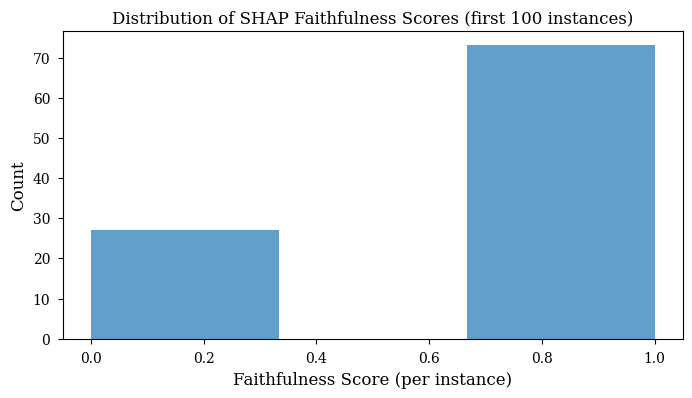

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sys
import importlib

sys.path.append('/home/ibibers/XAI_Evalation_For_IDS_datasets/XAI_Evaluation_Metrices')
import Accuracy_of_Explanation
importlib.reload(Accuracy_of_Explanation)

from Accuracy_of_Explanation import XAIExplanationAccuracyEvaluator , PaperResultsGenerator


evaluator = XAIExplanationAccuracyEvaluator(
    model=xgb_model,
    perturbation_strategy='median',
    task='classification'
)

sample_sizes = [20, 50, 100, 200, 500, 1000]
faithfulness_shap_scores = []
faithfulness_lime_scores = []

generator = PaperResultsGenerator(output_dir="./Exp_Acc_Sim_XGBoost_results")
for size in sample_sizes:
    X_sample = X_test.iloc[:size]
    faithfulness_shap = evaluator.evaluate(
        explainer=Shap_explainer,
        X=X_sample,
        method='shap',
        top_k=15,
        return_details=False
    )
    faithfulness_lime = evaluator.evaluate(
        explainer=lime_explianer,
        X=X_sample,
        method='lime',
        top_k=15,
        return_details=False
    )
    faithfulness_shap_scores.append(faithfulness_shap)
    faithfulness_lime_scores.append(faithfulness_lime)

    results = generator.run_complete_evaluation(
        model=xgb_model,
        X=X_sample,
        explainer_lime=lime_explianer,
        explainer_shap=Shap_explainer,
        dataset_name="XGBoost Simrgel Dataset",  
        top_k_values=[5 , 10 , 15 , 20 ],
        n_samples_validation=1000
    )


generator.generate_tables(results)
generator.generate_figures(results)
generator.generate_summary_report(results)

print("\n" + "="*70)
print("DT COMPLETE! All results saved to ./results/")
print("="*70)
print("\nGenerated files:")
print("  - tables/main_results.csv & .tex")
print("  - tables/validation.csv & .tex")
print("  - figures/faithfulness_by_k.pdf & .png")
print("  - figures/distribution_comparison.pdf & .png")
print("  - figures/baseline_comparison.pdf & .png")
print("  - summary_report.txt")

print(f"SHAP Faithfulness :", faithfulness_shap)
print(f"LIME Faithfulness :", faithfulness_lime)



plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, faithfulness_shap_scores, marker='o', label='SHAP Faithfulness', color='tab:blue')
plt.plot(sample_sizes, faithfulness_lime_scores, marker='s', label='LIME Faithfulness', color='tab:orange')
plt.xlabel('Sample Size', fontsize=13)
plt.ylabel('Faithfulness Score', fontsize=13)
plt.title('Faithfulness of SHAP and LIME Explanations vs. Sample Size', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




details = evaluator.evaluate(
    explainer=Shap_explainer,
    X=X_test.iloc[:100],
    method='shap',
    top_k=15,
    return_details=True
)
import pandas as pd
details_df = pd.DataFrame(details['details'])
print(details_df.head())


plt.figure(figsize=(8, 4))
plt.hist(details_df['faithfulness_score'], bins=3, color='tab:blue', alpha=0.7)
plt.xlabel('Faithfulness Score (per instance)')
plt.ylabel('Count')
plt.title('Distribution of SHAP Faithfulness Scores (first 100 instances)')
plt.show()